Predict if a tweet refers to a disaster with NLP
-----------------------------

![disaster](natural-disasters.jpg)

If a disaster happen on the world (somewhere), people begin to send messages on twitter or on other social medias. Those messages are collected plus others that don't talk about disaster. Then with the new natural language processing (nlp) methods we can make complex computations to differentiate each tweet and classify it easily with a created model (neural network, decision tree, regression model, ...). We will use in our task a neural network model and some deep nlp preprocessing. Let's identify, first, what will be the different parts of our notebook:

- Exploratory Data Analysis 
1. What is the shape of the Data frame ?
2. Does it contains null data or duplicated data ?
3. What columns will interest us ?
4. Does the data contains outliers or incoherences ?
5. Does the data contains to short or to long tweets and are they outliers ?
6. Can we say that the classes are unbanlanced ?
7. Can we guess easily the class of some tweets ?
8. Can we detect some patterns or key words in the tweets ?
9. What will the accuracy score that a human would know if they manually predict the data ? 
- Text Processing
1. Write a function which will help use tokenizing the tweets, deleting stop words, removing tokens with more than 3 letters,
2. How will we create the corpus (i.e a text containing all the documents)
3. If we obtain the corpus, how many unique tokens will we have? That number of tokens do it seems too small or to large to you?
4. How to reduce that number of unique tokens, or in other words "How to reduce the size of the vocabulary" in that corpus?
5. How many tokens are seen one time in the corpus? Those tokens do they interest us?
6. Do a stemming method will help us to reduce the dimensionality of the corpus?
7. How we can apply every previous processes to create a new must pertinent column "text"?   

In [1]:
# import the necessary
from nlp_project import *

### EDA (Exploratory Data Analysis)

#### Identify the shape of the data

Let's import the dataset. We will focus only on the training set for the moment.

In [2]:
train_set = pd.read_csv('nlp_project/data/kaggle_tweet_competition/train.csv')

We will use a copy of the original data to avoid missing the latter.

In [3]:
train_set_ = train_set.copy()

Let's print the shape.

In [4]:
train_set_.shape

(7613, 5)

It contains 7613 observations and 5 variables.

### Missing data and duplications

Let's identify the missing data with graphic and percentages.

In [5]:
null_data = train_set_.isnull()

Let's make a heat map to visualize the proportions

<AxesSubplot: >

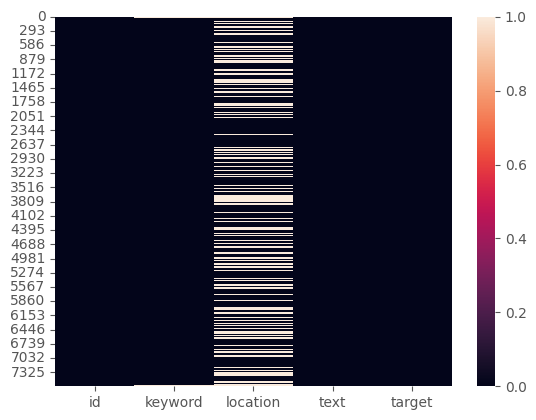

In [6]:
sns.heatmap(null_data)

We don't see clearly the percentages so let's plot them.

In [7]:
null_percentages = null_data.sum(axis=0)*100 / null_data.shape[0] 

In [8]:
null_percentages

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

<AxesSubplot: >

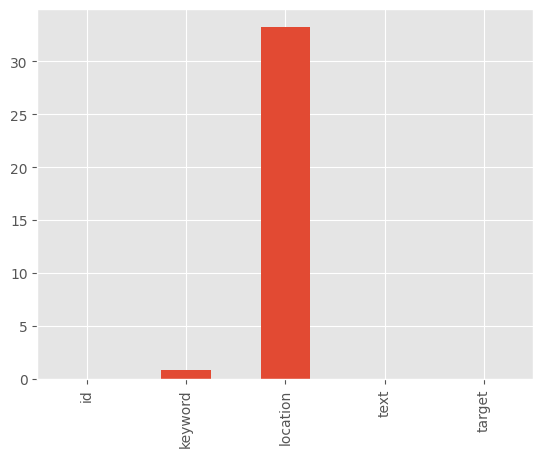

In [9]:
null_percentages.plot(kind="bar")

The location column contains 33% (the most important percentage) of missing data and the keyword column contains 0.8% of missing data.

Let's identify the duplications (by lines).

In [10]:
train_set_.duplicated().sum()

0

The sum of duplicated observations is equal to 0.

#### Columns of interest

Let's look at the columns by printing the first lines.

In [11]:
train_set_.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


We notice some interesting things:
- Some columns may not interest us which are keyword and location. Location contains 33% of missing values so it is important to remove it from the data. 
- The id column add a too great variance on the data because it identify uniquely each column which is already done by the index value. We have to remove it also.

Let's look at the value of keyword.

In [12]:
train_set_['keyword'].unique()[:10]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon'], dtype=object)

Apparently the keyword column contains interesting words that can identify the type of the tweets. So let's keep it.

The most important columns are certainly `text` (we are working on the text of the tweet) and `target` which we want to predict.

#### Outliers and incoherences

Let's verify if some of the keywords correspond to their texts.

In [13]:
pd.options.display.max_rows = 100

- For example with the keyword 'accident'

In [14]:
train_set_[train_set_['keyword'] == 'accident']

,id,keyword,location,text,target
67,96,accident,CLVLND,'I can't have kids cuz I got in a bicycle acci...,0
68,97,accident,"Nashville, TN",Accident on I-24 W #NashvilleTraffic. Traffic ...,1
69,98,accident,"Santa Clara, CA",Accident center lane blocked in #SantaClara on...,1
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0
71,102,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top...,0
72,104,accident,"Walker County, Alabama",Reported motor vehicle accident in Curry on He...,1
73,105,accident,Australia,BigRigRadio Live Accident Awareness,1
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
75,109,accident,NaN,RT @SleepJunkies: Sleeping pills double your r...,0
76,110,accident,Norf Carolina,'By accident' they knew what was gon happen ht...,0


We see that the most of the tweets actually talk about accidents. Let's look for the 'apocalypse' word.

In [15]:
train_set_[train_set_['keyword'] == 'apocalypse']

,id,keyword,location,text,target
272,396,apocalypse,ColoRADo,I'm gonna fight Taylor as soon as I get there.,0
273,397,apocalypse,sindria,ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPS...,1
274,398,apocalypse,NaN,will there be another jocelyn birthday apocalypse,0
275,401,apocalypse,NaN,RT: janenelson097: RT StephenSCIFI: Adaptation...,0
276,402,apocalypse,Texas,Apocalypse please,0
277,404,apocalypse,"Elk Grove, CA, USA",Another hour! It's August 05 2015 at 08:02PM H...,1
278,406,apocalypse,Texas,@HoneyBunzGem @primalkitchen I feel like me do...,0
279,407,apocalypse,NaN,She's kinda hot played on the radio today. Wha...,0
280,409,apocalypse,The Shire,But if it's the apocalypse lol gf m8,0
281,410,apocalypse,"Austin, TX",I know it's a question of interpretation but t...,1


Here we see that most of the tweets contains jokes and don't talk about apocalypse. So the keyword doesn't represent the truth about the tweet. Let's look at another keyword like 'annihilated'. 

In [16]:
train_set_[train_set_['keyword'] == 'annihilated']


,id,keyword,location,text,target
209,296,annihilated,Higher Places,The episode where Trunks annihilated Freiza is...,0
210,297,annihilated,"Horsemind, MI",THEY SHALL BE ANNIHILATED AND ALL OF THEIR PET...,0
211,298,annihilated,"New York, NY",Uribe just annihilated that baseball. #Mets,0
212,299,annihilated,Boksburg,@marksmaponyane Hey!Sundowns were annihilated ...,0
213,301,annihilated,NaN,@Volfan326 @TNeazzy Mizzou has annihilated flo...,0
214,302,annihilated,NaN,Annihilated Abs . ?? http://t.co/1xPw292tJe,1
215,303,annihilated,NaN,Be annihilated for status education mba on beh...,0
216,307,annihilated,"V-RP @OZRP_ ?MV, AU, R18+?",*to Luka* They should all die! All of them! Ev...,0
217,309,annihilated,"Greater Manchester, UK",@ACarewornHeart Have a good un fella sorry I w...,0
218,310,annihilated,Boston,Cop pulls drunk driver to safety SECONDS befor...,1


Like the last one, most of the tweets don't talk about annihilation so the keyword annihilation can be interpred like a falsy index of a non disaster. It may be dangerous in some cases.

Let's count how many unique values we have for keyword.

In [17]:
len(train_set_['keyword'].unique())

222

It is very important. Some keywords can be usefull because they represent the target. But it is important to make more investigations.

We can trace the count plot of each keyword by target variable. 

<AxesSubplot: xlabel='count', ylabel='keyword'>

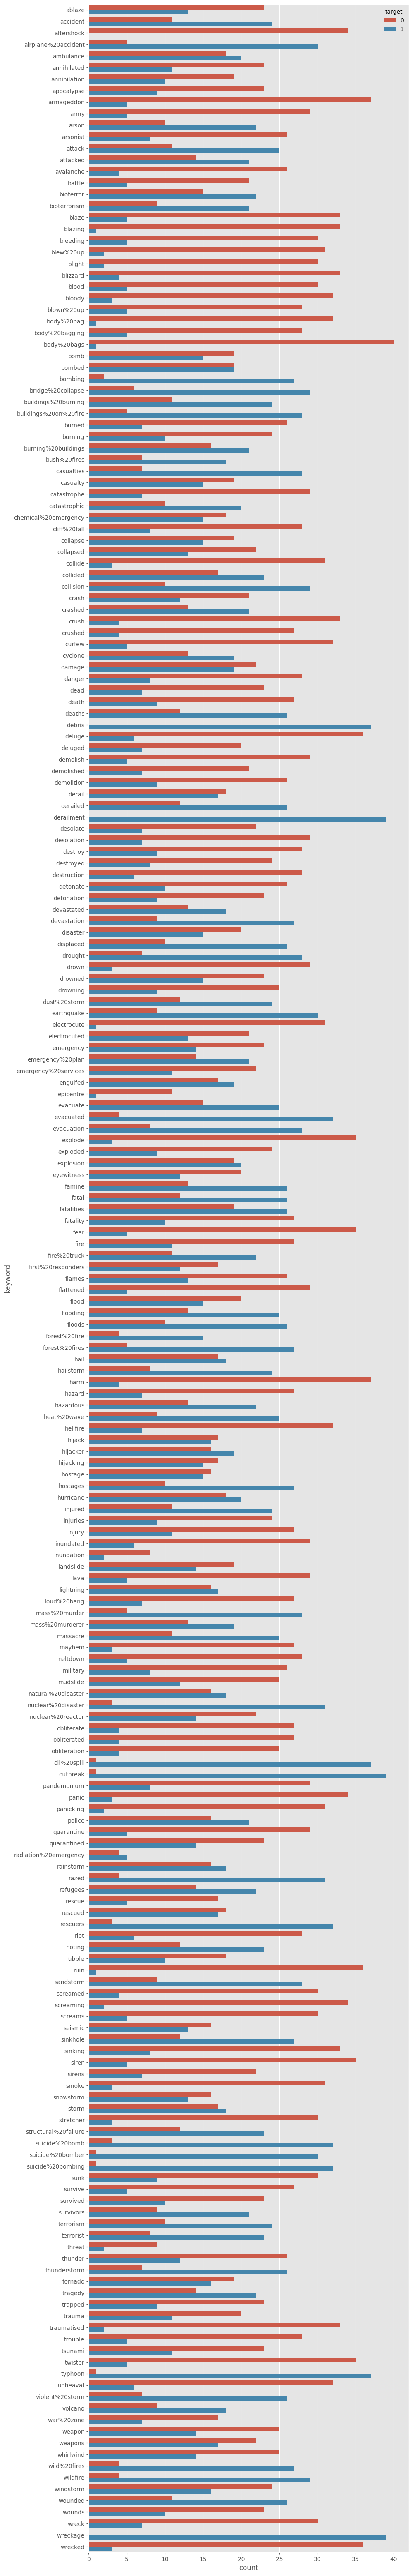

In [18]:
plt.figure(figsize=(10, 80))
sns.countplot(data=train_set_, y = 'keyword', hue='target')

With the previous graphic we can see clearly that the most of the keywords are incoherent with the target. But it seems that special keywords, inversely, represents the disaster target. 

In example: the keyword 'bush fires' cannot be used now because Bush is not actually the president of the USA. 

But it can be usefull for identifying the exaggeration made by the twitters on different disaster. The keyword 'apocalypse' doesn't truely represent the target because it is a unusual case.

#### Shortest and longest tweets

Let's look at the length of the shortest tweet and the length of the longest tweet.

In [19]:
# create a new column containing the length of the tweets
train_set_['tweet_len'] = train_set_['text'].map(lambda x: len(x))

In [20]:
# show the min and the max
train_set_['tweet_len'].min()

7

In [21]:
train_set_['tweet_len'].max()

157

In [22]:
# let's identify those texts
train_set_[(train_set_['tweet_len'] == 157) | (train_set_['tweet_len'] == 7)]['text'].values

array(["when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????",
       'Crushed', 'Bad day', 'Err:509'], dtype=object)

It seems that those tweets may be outliers let's take the tweets that are in the interval that we can identify by looking at the box plot of the tweet length.

<AxesSubplot: >

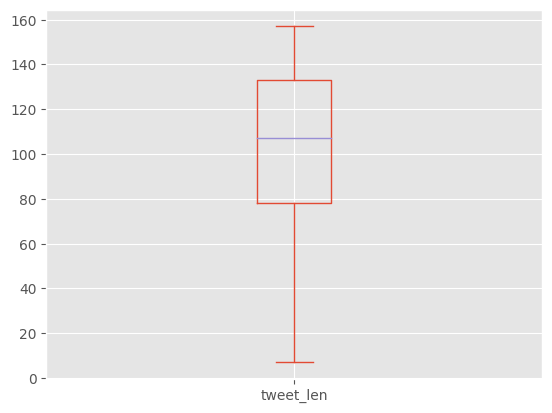

In [23]:
train_set_['tweet_len'].plot(kind="box")

In [24]:
# let's calculate the limitations 
l_high = train_set_['tweet_len'].quantile(0.75) + 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))
l_low = train_set_['tweet_len'].quantile(0.25) - 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))

In [25]:
l_high, l_low

(215.5, -4.5)

The limitations are higher and lower that the max length and the min length so those tweets doesn't represent outliers.

#### Identify targets with only text

Let's take randomly some tweets and verify if they represent their targets.

In [26]:
random_indexes = np.random.randint(0, train_set_.shape[0], 100)
train_set_.loc[random_indexes.tolist(), ['text', 'target']]

,text,target
7440,Acc to the study conducted by SKIMS morethan 5...,1
752,i'd still be team usagi even if she blew up th...,0
7247,@kirstiealley @_AnimalAdvocate Or pay it for a...,0
5912,I slammed my phone to the ground and then scre...,0
3849,that new lil b x chance is nothing but flames,0
6635,Fresh encounter in Pulwama of J&amp;amp;K one ...,1
7277,Last Second OutBid RT? http://t.co/KrNW0Wxhe5 ...,0
1377,'When you attack women's health you attack Ame...,0
1059,Listen to this hit song. A summer Bomb full of...,0
7237,@eyecuts @Erasuterism I love 96 Gal Deco to de...,1


We can identify easily, as human we are, the target of a tweet.

#### Identification of the patterns

Some words are commonly used in tweets that do not represent disaster events like 'drink', 'happy', '????', text containing more special symbols, or just words identifying happiness where other texts can be very useful to identify a disaster event. They may be the more saddest or shortest tweets: They contains some words like 'evacuation', 'falls' or more professional words used only by the people working on disaster events like practical nurse or government agents.

#### Human prediction

A human would certainly predict the target of a tweet very easily. The accuracy of a human prediction would be higher than 80%: -20% because some tweets can just contains deep jokes that cannot be interpret as they are (not a disaster) or can be contains bad writings even if they are serious.

### Text Processing

### Preprocessing

Before going through the processing we must make some preprocessing on the data frame.

The first thing to do is to replace missing values by commas because the columns containing missing values are objects.

In [52]:
train_set_.dtypes

id            int64
keyword      object
location     object
text         object
target        int64
tweet_len     int64
dtype: object

They are, in particular, keyword and location.

In [55]:
train_set_.fillna('', inplace = True)

We can also only remove the observations for which we find missing values but they may contain some important information about the targets.

Let's remove the columns location and id which do not make any interest to the purpose. 

In [57]:
train_set_.drop(columns=['id', 'location'], axis=1, inplace=True)

The keyword column may be deleted due to the incoherence between some values and the target. But we will keep it until exploring more deeply the data.

#### Tokenization and text cleaning

Let's create a function that we will apply on the column. We will work only on that column. Let's recuperate it as a list.

In [27]:
texts = train_set_['text']

In [28]:
texts

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [29]:
# transform to list
texts = texts.tolist()

We have to recuperate english stop words before doing the main staff.

In [30]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [31]:
en_stopwords = set(stopwords.words('english'))

Let's create the function.

In [32]:
# We transform each document to tokens and remove stopwords and 
# words with length less than 3 in one single line
text_transformation = lambda text, tokenizer, stop_words: [text_ for\
    text_ in tokenizer.tokenize(text.lower())\
        if text_ not in stop_words and len(text_) > 3]

def pre_transformation(texts, stop_words: list, regexp:str = r"\w+"):
    tokenizer = RegexpTokenizer(regexp)
    
    tokens = []
    for text in texts:
        tokens.append(text_transformation(text, tokenizer, stop_words))
    
    return tokens

Let's apply the transformation on the texts.

In [33]:
new_texts = pre_transformation(texts, en_stopwords)

#### Create a corpora containing all the texts

To create a corpora of all the texts we just need to add the documents (or tokens) in one single list of tokens.

In [34]:
corpora = []
for document in new_texts:
    
    corpora.extend(document)

It's possible to use the nltk Text class to make interesting search and analyzes. 

In [35]:
corpora_text = nltk.text.Text(corpora)

In [42]:
# print the length of the corpora
len(corpora)

69943

It contains 69943 words. We can make the corpora to be a one single text by using the usefully join function.

In [38]:
text_corpora = " ".join(corpora)

#### How many unique tokens 

Let's count the number of unique tokens that we obtained with the vocab function from the text corpora.

In [50]:
freqs = corpora_text.vocab()

In [51]:
# Let's print the number of unique words
len(freqs)

19893

The number of unique words is very large. We must reduce this number by using the word frequencies.

#### Reduce the number of tokens

To reduce the number of tokens we have to remove the most common words, i.e words appearing too frequently in the vocabulary.

But let's plot a box to verify the outlier limitations.

In [64]:
frequency = pd.DataFrame.from_dict(freqs, 'index')
frequency.rename({0: 'frequency'}, inplace=True, axis=1)

In [65]:
frequency.head()

,frequency
deeds,2
reason,20
earthquake,50
allah,9
forgive,2


<AxesSubplot: >

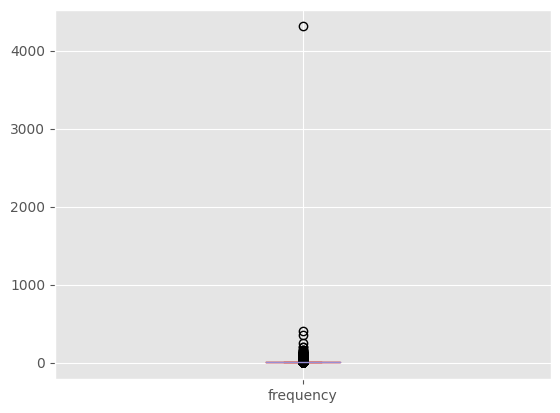

In [66]:
frequency.plot(kind='box')

Some words are too present in the corpora. Let's get numerically the limitations.

In [73]:
frequency['frequency'].quantile(0.75)

2.0

In [67]:
def guess_limitations(data_frame: pd.DataFrame, column: str):
    q1 = data_frame[column].quantile(0.25)
    q3 = data_frame[column].quantile(0.75)
    eq = q3 - q1
    limit1 = q3 + 1.5 * eq
    limit2 = q1 - 1.5 * eq
    return limit1, limit2

But we can also not use the outliers limitations and choose our own bounds. That's because some outliers may be interesting since they are not really outliers but unusual words.

Before eliminating the most common words let's trace a wordcloud to see what words are the most frequently used by the tweeters.

#### Word Cloud 1

The first wordcloud show us the most common words that we want to delete.

In [75]:
from wordcloud import WordCloud

To make a wordcloud we must consider the whole text and separate tokens so let's use the `text corpora` variable.

In [88]:
word_cloud = WordCloud(max_font_size=60, max_words=100).generate(text_corpora)

(-0.5, 399.5, 199.5, -0.5)

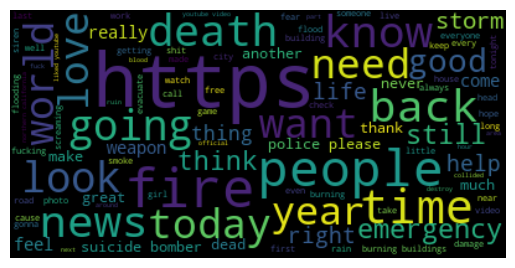

In [89]:
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')


Some most common words are important like the followings: fire, news, emergency, world, death, storm, world, police, weapon.